### Stock Market Prediction And Forecasting Using Stacked LSTM

In [444]:
# # C:\Users\anike\My Drive\College\FYP_resources_Gdrive\Test_Codes_do_not_touch\version_controll
# from google.colab import files
# uploaded = files.upload()

In [445]:
# !pip install tf-nightly
# ephocs = 10 and time_step=300
import os ## comment on production 
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import numpy as np
import tensorflow as tf
tf.__version__ #comment on production
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [446]:
# stock = 'RELIANCE.NS'  # 1
# stock = 'HDFCBANK.NS'  # 2
# stock = 'M&M.NS'  # 3
# stock = 'TATAMOTORS.NS'  # 4
# stock = 'BAJFINANCE.NS'  # 5
# stock = 'INFY.NS'  # 6
# stock = 'ICICIBANK.NS'  # 7
stock = 'TCS.NS'  # 8
# stock = 'WIPRO.NS'  # 9
# stock = 'HINDUNILVR.NS'  # 10

time_step = 50 # 50
epoch_value = 100 #100
days = 30 #30

In [447]:
stock_ticker = yf.Ticker(stock) # from yfianance  #comment on production
stock_data = stock_ticker.history(period="max")  #comment on production
stock_data = stock_data.loc['2018-5-31':]  #comment on production

# -------------------------Creating Date CSV-------------------------------------->
# This code is writtern to get date in csv forat variable dates takes stock_data 
# then deletes all coloumns of it and then converts only remaining row which is dates to csv
dates = stock_data.copy()  #comment on production
del dates['Open'],dates['Close'],dates['Low'],dates['High'],dates['Volume'],dates['Dividends'],dates['Stock Splits']  #comment on production
dates.to_csv('/content/universal_dates.csv')  # Used t create a universal dates csv   #comment on production
dates  #comment on production
# -------------------------------------------------------------------------------->

# -------------------------Creating Stock Data CSV-------------------------------->
df = stock_data  #comment on production
df.to_csv('/content/{}_dataset.csv'.format(stock), index=False)  #comment on production
stock_data = pd.read_csv('/content/{}_dataset.csv'.format(stock))  #comment on production
stock_data  #comment on production

# -------------------------Merging Stock data and Dates CSV----------------------->
# Read the CSV files
df_stock_values = pd.read_csv('/content/{}_dataset.csv'.format(stock))  #comment on production
df_dates = pd.read_csv('/content/universal_dates.csv')  #comment on production

# Merge the DataFrames based on a common column  ##
# stock_data = pd.merge(df_stock_values,df_dates, left_on=None)
stock_data = pd.concat([df_stock_values, df_dates], axis=1)  #comment on production
os.remove('/content/{}_dataset.csv'.format(stock))  #comment on production

# -------------------------Finalising merged file--------------------------------->
# Save the merged DataFrame to a new CSV file
stock_data.to_csv('/content/merged_{}_dataset.csv'.format(stock), index=False)  #comment on production
stock_data  #comment on production

stock_data = pd.read_csv('/content/merged_{}_dataset.csv'.format(stock)) # put adress where csv files are stored

close = stock_data['Close']
open = stock_data['Open']
high = stock_data['High']
low = stock_data['Low']
close#comment on production
open#comment on production
high#comment on production
low#comment on production


0       1561.853236
1       1552.985717
2       1549.637872
3       1548.325542
4       1551.990339
           ...     
1230    3267.100098
1231    3291.000000
1232    3312.000000
1233    3301.350098
1234    3265.149902
Name: Low, Length: 1235, dtype: float64

In [448]:
# df.to_csv("{}dataset.csv".format(stock),index = False)
# df.to_csv('/content/{}_dataset.csv'.format(stock), index=False)
# stock_data = pd.read_csv('/content/{}_dataset.csv'.format(stock))
# stock_data

In [449]:
# stock_data=df.reset_index()['close'] this is for tingo
# df
# stock_data
# stock_data=df.reset_index()['Close']
stock_data=stock_data.reset_index()['Close']
# stock_data #important

In [450]:
import matplotlib.pyplot as plt
# plt.plot(stock_data) #imp

In [451]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_data=scaler.fit_transform(np.array(stock_data).reshape(-1,1))

In [452]:
# print(df1)

In [453]:
##splitting dataset into train and test split
training_size=int(len(stock_data)*0.65)
test_size=len(stock_data)-training_size
train_data,test_data=stock_data[0:training_size,:],stock_data[training_size:len(stock_data),:1]

In [454]:
# training_size,test_size #important

In [455]:
#train_data

In [456]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [457]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# time_step = 200
# time_step = int(input("Enter time step genreally 100 -200 :  "))
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [458]:
# print(X_train.shape), print(y_train.shape)#important

In [459]:
# print(X_test.shape), print(ytest.shape) #important

In [460]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [461]:
### Create the Stacked LSTM 

In [462]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [463]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_34 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_35 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [464]:
# epoch_value = int(input("Enter no. of epochs generally 10-50 "))
# epoch_value = 30
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=epoch_value,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 218ms/step - loss: 0.0544 - val_loss: 0.0146
Epoch 2/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 3/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 4/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 5/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 7/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 9/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 10/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0020 - val_lo

In [465]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 [==============================] - 0s 32ms/step


In [466]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [467]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))#comment on production

2294.9896297436585

In [468]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))#comment on production

3317.194276480166

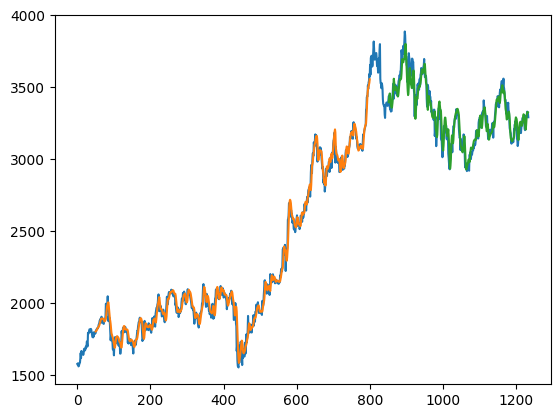

In [469]:
### Plotting 
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(stock_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(stock_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(stock_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()#comment on production

In [470]:
l = len(test_data) #important
# days = 10
n_steps=time_step

In [471]:
x_input=test_data[l-n_steps:].reshape(1,-1)
x_input.shape#comment on production

(1, 50)

In [472]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
#temp_input

In [473]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
i=0
while(i<days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))#important
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))#important
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])#important
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))#important
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7484268546104431], [0.7418176531791687], [0.736327052116394], [0.7314465045928955], [0.7269932627677917], [0.7229067087173462], [0.719234049320221], [0.7159348130226135], [0.7129263877868652], [0.7101267576217651], [0.7074180245399475], [0.7046831250190735], [0.7019590139389038], [0.6991851925849915], [0.6964610815048218], [0.6937827467918396], [0.6913461685180664], [0.6891695857048035], [0.6874569654464722], [0.6863104701042175], [0.6857833862304688], [0.6859878897666931], [0.6869024634361267], [0.6884891986846924], [0.6907681226730347], [0.6937016248703003], [0.6972067356109619], [0.7012585997581482], [0.7057406902313232], [0.7106216549873352]]


In [474]:
day_new=np.arange(1,time_step +1)
day_pred=np.arange(time_step +1,time_step +1 + days)

In [475]:
l2 = len(stock_data)

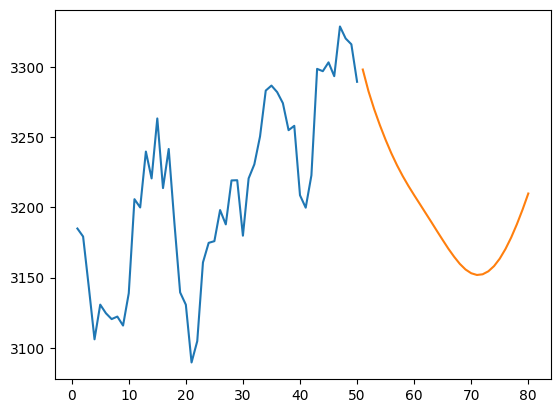

In [476]:
plt.plot(day_new,scaler.inverse_transform(stock_data[l2-n_steps:]))#comment on production
plt.plot(day_pred,scaler.inverse_transform(lst_output))#comment on production

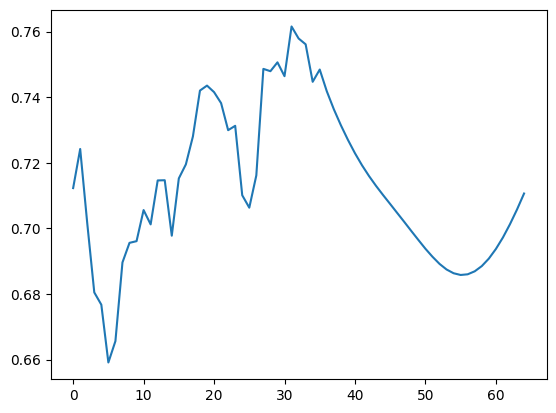

In [477]:
stock_data_merged=stock_data.tolist()
stock_data_merged.extend(lst_output)
plt.plot(stock_data_merged[1200:])#comment on production#comment on production

In [478]:
stock_data_merged=scaler.inverse_transform(stock_data_merged).tolist()

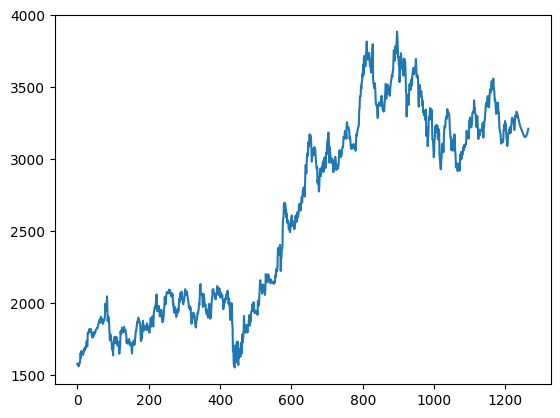

In [479]:
plt.plot(stock_data_merged) #comment on production

In [481]:
predicted_values = scaler.inverse_transform(lst_output)
close#comment on production
open#comment on production
high#comment on production
low#comment on production
predicted_values

array([[3298.23033555],
       [3282.79427937],
       [3269.97075941],
       [3258.57204406],
       [3248.17131839],
       [3238.62700679],
       [3230.04936282],
       [3222.34386354],
       [3215.31756521],
       [3208.77891618],
       [3202.45256096],
       [3196.06509295],
       [3189.70282179],
       [3183.22445028],
       [3176.86217912],
       [3170.6068205 ],
       [3164.91609379],
       [3159.83259695],
       [3155.83270335],
       [3153.15501729],
       [3151.92399167],
       [3152.40161792],
       [3154.53764156],
       [3158.24352566],
       [3163.56604443],
       [3170.41735699],
       [3178.60368432],
       [3188.06697626],
       [3198.53507911],
       [3209.93476892]])

# Runner

In [482]:
# # C:\Users\anike\My Drive\College\FYP_resources_Gdrive\Test_Codes_do_not_touch\version_controll
# from google.colab import files
# uploaded = files.upload()

In [483]:
prediction_dates = pd.read_csv('/content/prediction_dates.csv')  #comment on production
prediction_dates
predicted_values_df = pd.DataFrame(predicted_values, columns = ['Estimed Price'])
predicted_values_df
merged_stock_predicition = pd.concat([predicted_values_df, prediction_dates], axis=1)  #comment on production
merged_stock_predicition.to_csv('/content/{}_stock_predicition.csv'.format(stock))